# Performing classification on CIFAR10 Dataset using Keras

## Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

## Loading and dividing data into training and testing sets

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


**Visualizing Data**

(50000,)


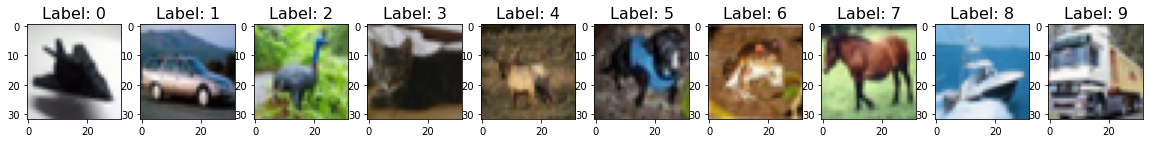

In [ ]:
f, ax = plt.subplots(1,10, figsize=(20,20))

label = y_train.reshape((y_train.shape[0],))
print(label.shape)
for i in range(0,10):
  sample = X_train[label == i][0]
  ax[i].imshow(sample)
  ax[i].set_title("Label: {}".format(i), fontsize=16)


**Converting labels into categorical binary values (one hot encoding)**

In [ ]:
test_target = y_test  # saving target for checking accuracy

In [ ]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
print(y_train[0:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
X_train = X_train/255
X_test = X_test/255

## Build Model

**Creating a model with** 


1.   i/p layer = 784
2.   hidden layer = (512,256,128)
3.   dropout layer with 25% dead neurons to stop overfitting
4.   o/p layer = 10 with softmax for converting into 0 or 1



In [ ]:
# model = Sequential()
# model.add(Conv2D(filters = 32,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu',input_shape = (32,32,3)))
# model.add(Dropout(rate = 0.2))

# model.add(Conv2D(filters = 32,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2),strides = 2))

# model.add(Conv2D(filters = 64,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu'))
# model.add(Dropout(rate = 0.2))

# model.add(Conv2D(filters = 64,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2),strides = 2))

# model.add(Conv2D(filters = 128,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu'))
# model.add(Dropout(rate = 0.2))

# model.add(Conv2D(filters = 128,kernel_size = (3,3),strides = 1,padding = 'same',activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2),strides = 2))

# model.add(Flatten())
# model.add(Dropout(rate = 0.2))
# model.add(Dense(units = 128,activation = 'relu'))
# model.add(Dropout(rate = 0.2))
# model.add(Dense(units = 10,activation = 'softmax'))

# model.summary()

input_shape = X_train[0].shape;

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu',input_shape=input_shape))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))



model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_26 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 7, 7, 128)       

**Compiling and fitting Model** 

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
y_history = model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8993 - accuracy: 0.2796 - val_loss: 1.2754 - val_accuracy: 0.5362
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2733 - accuracy: 0.5454 - val_loss: 1.1305 - val_accuracy: 0.6068
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0147 - accuracy: 0.6466 - val_loss: 0.9104 - val_accuracy: 0.6848
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8713 - accuracy: 0.7054 - val_loss: 0.8302 - val_accuracy: 0.7190
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7743 - accuracy: 0.7375 - val_loss: 0.8293 - val_accuracy: 0.7172
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7251 - accuracy: 0.7569 - val_loss: 0.8911 - val_accuracy: 0.7134
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6702 - accuracy: 0.7723 - val_loss: 0.8126 - val_accuracy:

## Evaluating Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

313/313 [==============================] - 1s 3ms/step - loss: 1.0341 - accuracy: 0.7670
Test Accuracy: 76.70%


In [ ]:
prediction = model.predict(X_test)
prediction

array([[2.0255502e-03, 2.0718866e-05, 4.8091104e-03, ..., 2.0673332e-07,
        1.8793698e-03, 1.9784895e-06],
       [1.8033120e-04, 5.1768665e-04, 1.7244840e-10, ..., 7.2305124e-14,
        9.9930191e-01, 1.3993576e-08],
       [4.9069471e-04, 2.0827700e-03, 3.6538603e-07, ..., 1.8053572e-07,
        9.9652892e-01, 2.6902198e-04],
       ...,
       [9.5601109e-09, 1.2507000e-10, 2.2425340e-05, ..., 1.6258468e-06,
        8.7416501e-09, 8.8265339e-11],
       [3.9279432e-05, 1.7316079e-01, 7.8585754e-06, ..., 2.5845502e-04,
        9.6414190e-08, 1.3904607e-07],
       [2.0703732e-10, 4.3426499e-12, 5.4069289e-08, ..., 9.9954081e-01,
        1.7477005e-10, 7.8288528e-11]], dtype=float32)

In [ ]:
prediction = np.argmax(prediction, axis=1)
print(prediction)
print(prediction.shape)

[3 8 0 ... 5 4 7]
(10000,)


In [ ]:
#calculating various metrics
print("\n-------------------------Accuracy Score----------------------------\n\t\t\t     ",metrics.accuracy_score(test_target, prediction, normalize= True))
print("\n---------------------Classification Report-------------------------\n",metrics.classification_report(test_target, prediction))
print("\n--------------------------Confusion Matrix-------------------------\n",metrics.confusion_matrix(test_target,prediction))


-------------------------Accuracy Score----------------------------
			      0.6215

---------------------Classification Report-------------------------
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      1000
           1       0.67      0.80      0.73      1000
           2       0.55      0.50      0.52      1000
           3       0.47      0.38      0.42      1000
           4       0.55      0.54      0.55      1000
           5       0.58      0.46      0.51      1000
           6       0.71      0.66      0.68      1000
           7       0.57      0.78      0.66      1000
           8       0.73      0.76      0.74      1000
           9       0.68      0.65      0.66      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000


--------------------------Confusion Matrix-------------------------
 [[692  51  50  1